In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as f
import numpy as np 
from torch.utils.data import TensorDataset, DataLoader, random_split
import matplotlib.pyplot as plt 
import auto_encoder

In [2]:
get_dataset = auto_encoder.get_dataset
data_2 = '2_qubit_crit_data.npz'
data_4 = '4_qubit_crit_data.npz'
data_6 = '6_qubit_crit_data.npz'
data_7 = '7_qubit_crit_data.npz'
#data_10 = '10_qubit_crit_data.npz'

#data_11 = '11_qubit_crit_data.npz'
data_12 = '12_qubit_crit_data.npz'



training_n_sizes = [2,4,7]
validation_n_sizes = [6,2,4,7]


training_data_2 = get_dataset(data_2, 2, 1000)
training_data_4 = get_dataset(data_4,4,1000)
training_data_7 = get_dataset(data_7,7,1000) 

training_data_2, val_data_2 = random_split(training_data_2, [900,100])
training_data_4, val_data_4 = random_split(training_data_4, [900,100])
training_data_7, val_data_7 = random_split(training_data_7, [900,100])

#training_data_10 = get_dataset(data_10,10,200)
#training_data_11 = get_dataset(data_11,11,200)
training_data_12 = get_dataset(data_12,12,100)

datasets = [training_data_2,
            training_data_4,
            training_data_7]

training_loaders = [DataLoader(x, batch_size = 32,  shuffle=True, num_workers=20) for x in datasets]

val_data_6 = get_dataset(data_6, 6, 1000)

val_datasets = [val_data_6, val_data_2, val_data_4, val_data_7]

val_loaders = [DataLoader(x, batch_size = 1000, num_workers=20) for x in val_datasets]

#test_loader_10 = DataLoader(training_data_10, batch_size = 200, num_workers = 20)
#test_loader_11 = DataLoader(training_data_11, batch_size = 200, num_workers = 20)
test_loader_12 = DataLoader(training_data_12, batch_size = 100, num_workers = 20)

/home/jszacha1/.conda/envs/conda_env/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [3]:
warmup_2 = next(iter(training_loaders[0]))
warmup_4 = next(iter(training_loaders[1]))
warmup_7 = next(iter(training_loaders[2]))

In [4]:
mps_size = 5
model = auto_encoder.MPS_autoencoder(mps_size = mps_size)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.MSELoss(reduction='sum')

warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]

for j in range(10):
    for i in range(3):
        for epoch in range(10):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 10 == 0):
                print(warmup_data[i][1],"\t", loss.item() *(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

2 	 186.79212951660156
4 	 153.208984375
7 	 3589.1591796875
2 	 9.079083442687988
4 	 80.55752563476562
7 	 1071.964599609375
2 	 3.974764585494995
4 	 37.67088317871094
7 	 586.3236694335938
2 	 2.136324882507324
4 	 27.647279739379883
7 	 446.98876953125
2 	 1.2133949995040894
4 	 15.109512329101562
7 	 405.82049560546875
2 	 1.60049569606781
4 	 18.919227600097656
7 	 405.7139587402344
2 	 1.3106727600097656
4 	 17.784822463989258
7 	 369.4637451171875
2 	 1.342894434928894
4 	 16.491989135742188
7 	 403.4952087402344
2 	 1.4791698455810547
4 	 13.059697151184082
7 	 289.1440734863281
2 	 1.7289401292800903
4 	 19.28384017944336
7 	 381.4818115234375


In [5]:
for j in range(10):
    print("Cycle: \t", j)
    print("*"*40)
    for i in range(3):
        for epoch in range(201):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 100 == 0):
                print(warmup_data[i][1],"\t", loss.item()*(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

Cycle: 	 0
****************************************
2 	 2.105512857437134
2 	 0.4017886817455292
2 	 0.6954440474510193
4 	 11.861906051635742
4 	 7.880246162414551
4 	 2.9215734004974365
7 	 576.3653564453125
7 	 55.04964065551758
7 	 44.076690673828125
Cycle: 	 1
****************************************
2 	 2.1989457607269287
2 	 0.20242878794670105
2 	 0.16012883186340332
4 	 13.419371604919434
4 	 3.1175808906555176
4 	 3.1568589210510254
7 	 304.6437072753906
7 	 25.57405662536621
7 	 41.30855178833008
Cycle: 	 2
****************************************
2 	 1.582976222038269
2 	 0.15342795848846436
2 	 0.13881099224090576
4 	 8.133453369140625
4 	 2.360363245010376
4 	 1.9393177032470703
7 	 210.43719482421875
7 	 26.311134338378906
7 	 35.04673385620117
Cycle: 	 3
****************************************
2 	 1.050445318222046
2 	 0.1802435964345932
2 	 0.13221044838428497
4 	 5.569578170776367
4 	 2.3037209510803223
4 	 1.573072075843811
7 	 134.19606018066406
7 	 44.742336273193

In [6]:
warmup_2 = next(iter(training_loaders[0]))
warmup_4 = next(iter(training_loaders[1]))
warmup_7 = next(iter(training_loaders[2]))
warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]


for j in range(10):
    for i in range(3):
        for epoch in range(10):
            fields,wf = warmup_data[i][0]
            gs = model(fields, warmup_data[i][1])            
            loss = loss_func(gs, wf)
            if (epoch % 10 == 0):
                print(warmup_data[i][1],"\t", loss.item() *(2**warmup_data[i][1]))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

2 	 2.2590837478637695
4 	 1.4994535446166992
7 	 82.30277252197266
2 	 0.3682818114757538
4 	 6.725131511688232
7 	 149.85426330566406
2 	 0.27821770310401917
4 	 14.358280181884766
7 	 149.99032592773438
2 	 0.687233567237854
4 	 18.214950561523438
7 	 214.21347045898438
2 	 1.3551708459854126
4 	 9.831408500671387
7 	 206.82513427734375
2 	 0.6057677268981934
4 	 2.128439426422119
7 	 150.35906982421875
2 	 0.45164358615875244
4 	 3.2222909927368164
7 	 192.63107299804688
2 	 1.5542408227920532
4 	 9.297884941101074
7 	 183.100830078125
2 	 2.0002760887145996
4 	 4.711623191833496
7 	 248.5524139404297
2 	 1.1927226781845093
4 	 3.6822774410247803
7 	 278.242431640625


In [7]:
import pickle
warmup_data = [(warmup_2,2), (warmup_4,4), (warmup_7,7)]
f = open("warmup_data_2.p", 'wb')
pickle.dump(warmup_data, f)
f.close()

In [8]:

f = open("warmup_data_1.p", 'wb')
pickle.dump(warmup_data, f)
f.close()

In [9]:
val_6 = next(iter(val_loaders[0]))
val_2 = next(iter(val_loaders[1]))
val_4 = next(iter(val_loaders[2]))
val_7 = next(iter(val_loaders[3]))
#val_10 = next(iter(test_loader_10))
#val_11 = next(iter(test_loader_11))
val_12 = next(iter(test_loader_12))

In [10]:
val_data = [(val_6,6),(val_2,2),(val_4,4),(val_7,7), (val_12,12)]
loss_func = nn.MSELoss()
for data, size in val_data:
    with torch.no_grad():
        fields, wf = data
        gs = model(fields, size)
        loss = loss_func(gs,wf)
        print(size,"\t" ,loss.item() * (2**size))
        #print(gs[0], wf[0])
        #print(gs[-1], wf[-1])        

6 	 0.02839267998933792
2 	 0.012261451222002506
4 	 0.05088376626372337
7 	 0.014232990331947803
12 	 0.11870206892490387


In [11]:
f = open("test_data_1.p", 'wb')
pickle.dump(val_data, f)

In [12]:
device = torch.device("cpu")
for N, train_loader in enumerate(training_loaders):            
    temp = 0
    sys_size = training_n_sizes[N]
    for i, (fields,wf) in enumerate(train_loader):
        fields = fields.to(device)
        gs = model(fields, sys_size)            
        loss = loss_func(gs, wf.to(device))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        temp += loss.item()
    temp = temp / (len(train_loader))    

In [29]:
mag_loaders = [DataLoader(x,batch_size = 200, num_workers=20) for x in val_datasets]
def seq_to_magnetization(arr_seq, num_qubits):
    
    mag_vec = []
    for elem in arr_seq:
        magnetization = 0
        for char in elem:
            temp = (int(char)*-2)+1
            magnetization += temp 
        mag_vec.append(magnetization)
    mag_vec = np.array(mag_vec)
    mag_vec = mag_vec / (num_qubits)
    return mag_vec   

def seq_gen(num_q):
    if num_q == 2:
        return ['00','01', '10','11']
    else:
        temp = []
        
        smaller_vals = seq_gen(num_q-1)
        for i in ['0','1']:
            for each in smaller_vals:
                temp.append(i+each)
        return temp 
    
def gen_graph(model):
    data_sizes = [2,4,6,7,12]
    training_data_2 = get_dataset(data_2, 2, 1000)
    training_data_4 = get_dataset(data_4,4,1000)
    training_data_7 = get_dataset(data_7,7,1000) 
    val_data_6 = get_dataset(data_6, 6, 1000)
    #val_data_10 = get_dataset(data_10,10,1000)
    #val_data_11 = get_dataset(data_11,11,1000)
    val_data_12 = get_dataset(data_12,12,100)
    mag_dat = [training_data_2,training_data_4,val_data_6,training_data_7, val_data_12]
    mag_loaders = [DataLoader(x, batch_size = 1000, num_workers=20) for x in mag_dat]
    
    model.eval()
    with torch.no_grad():
        n_systems = {}
        for j,loader in enumerate((mag_loaders)):
            sys_size = data_sizes[j]
            wave_functions = []
            true_wave = []
            for i, (fields,wf) in enumerate(loader):
                fields = fields
                gs = model(fields, sys_size)

                wave_functions.append(gs)
                true_wave.append(wf)
                
            n_systems[sys_size] = (wave_functions,true_wave)


    data_y_2 = n_systems[2][0][0].numpy()
    data_y_4 = n_systems[4][0][0].numpy()
    data_y_7 = n_systems[7][0][0].numpy()
    data_y_6 = n_systems[6][0][0].numpy()
    #data_y_10 = n_systems[10][0][0].numpy()
    #data_y_11 = n_systems[11][0][0].numpy()
    data_y_12 = n_systems[12][0][0].numpy()
    
#     print(data_y_2.shape)
    data_y_2_t = n_systems[2][1][0].numpy()
    data_y_4_t = n_systems[4][1][0].numpy()
    data_y_7_t = n_systems[7][1][0].numpy()
    data_y_6_t = n_systems[6][1][0].numpy()
    #data_y_10_t = n_systems[10][1][0].numpy()
    #data_y_11_t = n_systems[11][1][0].numpy()
    data_y_12_t = n_systems[12][1][0].numpy()
    
    vec = seq_to_magnetization(seq_gen(2),2)
    vec_2 = (vec.view()).reshape((4,1))
    mag_2 = np.squeeze((np.power(data_y_2,2) @ vec_2))
    mag_2_t = np.squeeze((np.power(data_y_2_t,2) @ vec_2))
    
    vec_4 = seq_to_magnetization(seq_gen(4),4).reshape((16,1))
    mag_4 = np.squeeze((np.power(data_y_4,2) @ vec_4))
    mag_4_t = np.squeeze((np.power(data_y_4_t,2) @ vec_4))
    
    vec_6 = seq_to_magnetization(seq_gen(6),6).reshape((64,1))
    mag_6 = np.squeeze((np.power(data_y_6,2) @ vec_6))
    mag_6_t = np.squeeze((np.power(data_y_6_t,2) @ vec_6))
    
    vec_7 = seq_to_magnetization(seq_gen(7),7).reshape((128,1))
    mag_7 = np.squeeze((np.power(data_y_7,2) @ vec_7))
    mag_7_t = np.squeeze((np.power(data_y_7_t,2) @ vec_7))
    
#     vec_10 = seq_to_magnetization(seq_gen(10),10).reshape((1024,1))
#     mag_10 = np.squeeze((np.power(data_y_10,2) @ vec_10))
#     mag_10_t = np.squeeze((np.power(data_y_10_t,2) @ vec_10))
    
#     vec_11 = seq_to_magnetization(seq_gen(11),11).reshape((2048,1))
#     mag_11 = np.squeeze((np.power(data_y_11,2) @ vec_11))
#     mag_11_t = np.squeeze((np.power(data_y_11_t,2) @ vec_11))

    vec_12 = seq_to_magnetization(seq_gen(12),12).reshape((4096,1))
    mag_12 = np.squeeze((np.power(data_y_12,2) @ vec_12))
    mag_12_t = np.squeeze((np.power(data_y_12_t,2) @ vec_12))

    x = np.linspace(0,3,1000)
    x12=np.linspace(0,3,100)
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(14,6))
    
    ax1.plot(x,mag_2, label='2 Qubits')
    ax1.plot(x,mag_4, label='4 Qubits')
    ax1.plot(x,mag_6, label='6 Qubits')
    ax1.plot(x,mag_7, label='7 Qubits')
    #ax1.plot(x,mag_10, label='10 Qubits')
    #ax1.plot(x,mag_11, label='11 Qubits')
    ax1.plot(x12 ,mag_12, label='12 Qubits')
    
    ax2.plot(x,mag_2_t, label='2 Qubits')
    ax2.plot(x,mag_4_t, label='4 Qubits')
    ax2.plot(x,mag_6_t, label='6 Qubits')    
    ax2.plot(x,mag_7_t, label='7 Qubits')
    #ax2.plot(x,mag_10_t, label='10 Qubits')
    #ax2.plot(x,mag_11_t, label='11 Qubits')
    ax2.plot(x12,mag_12_t, label='12 Qubits')

#     plt.plot(x,mag_10, label='10 Qubits')
#     plt.plot(x,mag_11, label='11 Qubits')
#     plt.plot(x12,mag_12, label='12 Qubits')


    ax1.legend()
    ax2.legend()
    ax1.set_title("MPS Generated Magnetization")
    ax2.set_title("Ground Truth Magnetization")
    ax1.set_xlabel("Bx")
    ax1.set_ylabel("Magnetization")
    #ax1.title('J=1, Bz=0.01')
    #ax1.set_xlabel("Bx")
    #ax1.set_ylabel("Magnetization")
    
    

/home/jszacha1/.conda/envs/conda_env/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


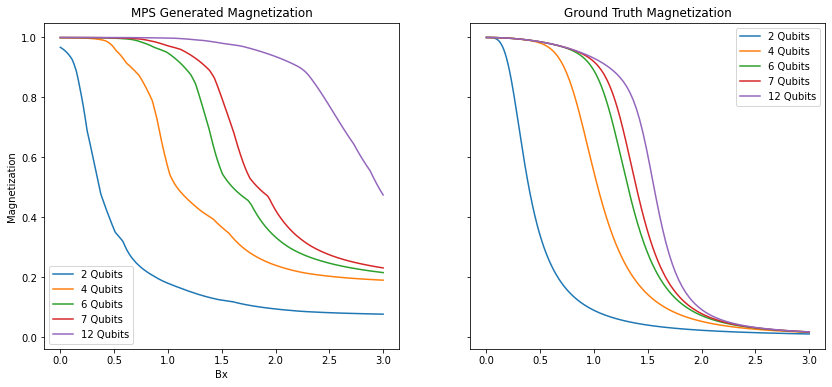

In [30]:
gen_graph(model)

In [15]:
torch.save(model.state_dict(), "2_site_model.pt")

In [16]:
def get_model(mps_size):
    PATH = "{}_site_model.pt".format(mps_size)
    device = torch.device('cpu')
    model = auto_encoder.MPS_autoencoder(mps_size)
    model.load_state_dict(torch.load(PATH, map_location=device))
    return model 

In [17]:
#model = get_model(2)

with torch.no_grad():
    encoded_spin_up = []
    encoded_spin_down = []
    
    
#     for i,(fields,wf) in enumerate(val_loader_4):
#         spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
#         encoded_spin_up.append(spin_up.squeeze())
#         encoded_spin_down.append(spin_down.squeeze())
        
#     for i,(fields,wf) in enumerate(val_loader_7):
#         spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
#         encoded_spin_up.append(spin_up.squeeze())
#         encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(training_loaders[0]):
        spin_up, spin_down = model.encode(fields)
        #print(fields)
        #print(spin_up.squeeze().shape)
        #print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(training_loaders[1]):
        spin_up, spin_down = model.encode(fields)
        #print(spin_up.squeeze().shape)
        #print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())  

/home/jszacha1/.conda/envs/conda_env/lib/python3.9/site-packages/torch/utils/data/dataloader.py:474: UserWarning: This DataLoader will create 20 worker processes in total. Our suggested max number of worker in current system is 6, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [18]:
#model = get_model(2)

with torch.no_grad():
    encoded_spin_up = []
    encoded_spin_down = []        
       
    for i,(fields,wf) in enumerate(val_loaders[0]):
        spin_up, spin_down = model.encode(fields)
#         print(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())
        
    for i,(fields,wf) in enumerate(val_loaders[1]):
        spin_up, spin_down = model.encode(fields)
#         print(spin_up.squeeze().shape)
#         print(spin_down.squeeze().shape)
        encoded_spin_up.append(spin_up.squeeze())
        encoded_spin_down.append(spin_down.squeeze())  

In [19]:
data_up = encoded_spin_up[0].numpy()
data_down = encoded_spin_down[0].numpy()
for i in range(1, len(encoded_spin_up)):
    data_up = np.vstack((data_up, encoded_spin_up[i].numpy()))
    data_down = np.vstack((data_down, encoded_spin_down[i].numpy()))
    
print(data_up.shape)
print(data_down.shape)

(1100, 5, 5)
(1100, 5, 5)


In [20]:
data_up = data_up.reshape((data_up.shape[0],25))
data_down = data_down.reshape((data_up.shape[0],25))

In [21]:
np.savetxt("mps_2_up_matrix.csv", data_up, delimiter=",")
np.savetxt("mps_2_down_matrix.csv", data_down, delimiter=",")

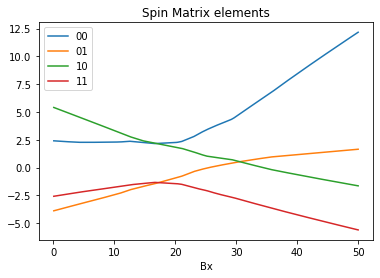

In [22]:
x = np.arange(1,1001)
x = x / (100) * 5

plt.plot(x,data_up[0:1000,0], label='00')
plt.plot(x,data_up[0:1000,1], label='01')
plt.plot(x,data_up[0:1000,2], label='10')
plt.plot(x,data_up[0:1000,3], label='11')
plt.xlabel('Bx')
plt.title('Spin Matrix elements')
plt.legend()

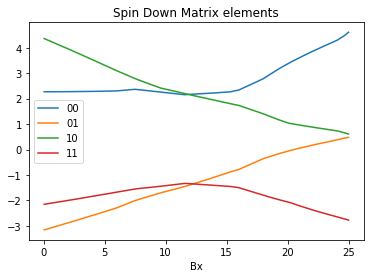

In [23]:
x = np.arange(1,501)
x = x / (100) * 5
k = 2
m = k-1
plt.plot(x,data_up[100*m:300*k,0], label='00')
plt.plot(x,data_up[100*m:300*k,1], label='01')
plt.plot(x,data_up[100*m:300*k,2], label='10')
plt.plot(x,data_up[100*m:300*k,3], label='11')
plt.xlabel('Bx')
plt.title('Spin Down Matrix elements')
plt.legend()

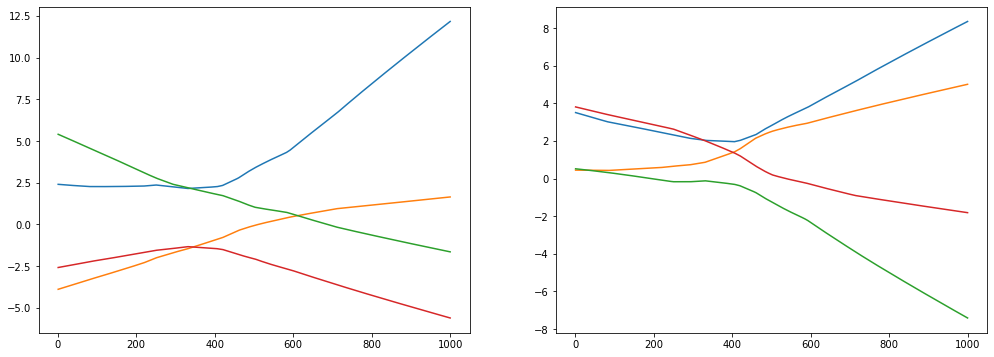

In [24]:
x = np.arange(1,1001)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,6))

for i in range(4):
    for k in range(1):
        ax1.plot(x,data_up[100*k:1000*(k+1),i])
        ax2.plot(x,data_down[100*k:1000*(k+1),i])


(1100, 50)
(100,)


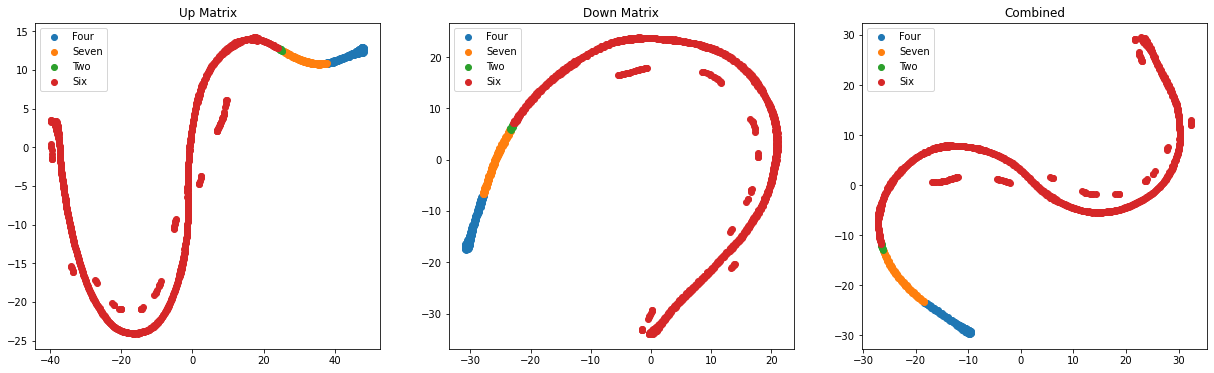

In [25]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

up=data_up
down=data_down
data = np.hstack((data_up, data_down))

print(data.shape)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,6))

pca = TSNE(n_components=2, perplexity=50)

up = pca.fit_transform(up)
down = pca.fit_transform(down)
data = pca.fit_transform(data)

print(up[:100][:,0].shape)
ax1.scatter(up[:100][:,0],up[:100][:,1] ,label='Four')
ax1.scatter(up[100:200][:,0],up[100:200][:,1] ,label='Seven')
ax1.scatter(up[200:210][:,0],up[200:210][:,1] ,label='Two')
ax1.scatter(up[210:][:,0],up[210:][:,1] ,label='Six')
ax1.set_title('Up Matrix')

ax1.legend()

ax2.scatter(down[:100][:,0],down[:100][:,1] ,label='Four')
ax2.scatter(down[100:200][:,0],down[100:200][:,1] ,label='Seven')
ax2.scatter(down[200:210][:,0],down[200:210][:,1] ,label='Two')
ax2.scatter(down[210:][:,0],down[210:][:,1] ,label='Six')
ax2.set_title('Down Matrix')

ax2.legend()

ax3.scatter(data[:100][:,0],data[:100][:,1] ,label='Four')
ax3.scatter(data[100:200][:,0],data[100:200][:,1] ,label='Seven')
ax3.scatter(data[200:210][:,0],data[200:210][:,1] ,label='Two')
ax3.scatter(data[210:][:,0],data[210:][:,1] ,label='Six')
ax3.set_title('Combined')
ax3.legend()


#scaled by 1/10 from old code

(1000,)


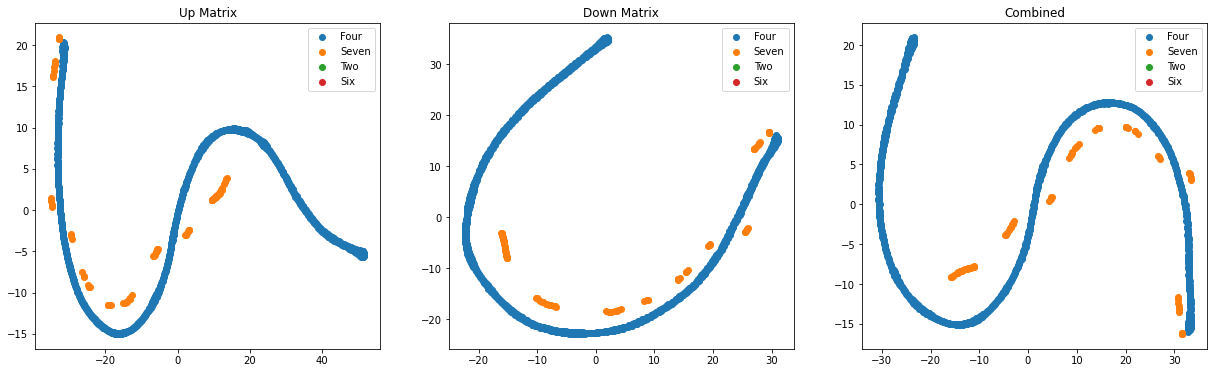

In [26]:
from sklearn.decomposition import PCA
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21,6))

pca = PCA(n_components=2)

up = pca.fit_transform(up)
down = pca.fit_transform(down)
data = pca.fit_transform(data)

print(up[:1000][:,0].shape)
ax1.scatter(up[:1000][:,0],up[:1000][:,1] ,label='Four')
ax1.scatter(up[1000:2000][:,0],up[1000:2000][:,1] ,label='Seven')
ax1.scatter(up[2000:2100][:,0],up[2000:2100][:,1] ,label='Two')
ax1.scatter(up[2100:][:,0],up[2100:][:,1] ,label='Six')
ax1.set_title('Up Matrix')

ax1.legend()

ax2.scatter(down[:1000][:,0],down[:1000][:,1] ,label='Four')
ax2.scatter(down[1000:2000][:,0],down[1000:2000][:,1] ,label='Seven')
ax2.scatter(down[2000:2100][:,0],down[2000:2100][:,1] ,label='Two')
ax2.scatter(down[2100:][:,0],down[2100:][:,1] ,label='Six')
ax2.set_title('Down Matrix')

ax2.legend()

ax3.scatter(data[:1000][:,0],data[:1000][:,1] ,label='Four')
ax3.scatter(data[1000:2000][:,0],data[1000:2000][:,1] ,label='Seven')
ax3.scatter(data[2000:2100][:,0],data[2000:2100][:,1] ,label='Two')
ax3.scatter(data[2100:][:,0],data[2100:][:,1] ,label='Six')
ax3.set_title('Combined')
ax3.legend()